In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
playlist = pd.read_csv('data/PlayList.csv')
injuries = pd.read_csv('data/InjuryRecord.csv')

DM_M1: One-hot encoding indicating 1 or more days missed due to injury
DM_M7: One-hot encoding indicating 7 or more days missed due to injury
DM_M28: One-hot encoding indicating 28 or more days missed due to injury
DM_M42: One-hot encoding indicating 42 or more days missed due to injury

In [11]:
# 1. Summarizing frequencies for DM_M1, DM_M7, DM_M28, and DM_M42
dm_stats = injuries[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum()
print("Total Count of Missed Days Due to Injuries:")
print(dm_stats)

Total Count of Missed Days Due to Injuries:
DM_M1     105
DM_M7      76
DM_M28     37
DM_M42     29
dtype: int64


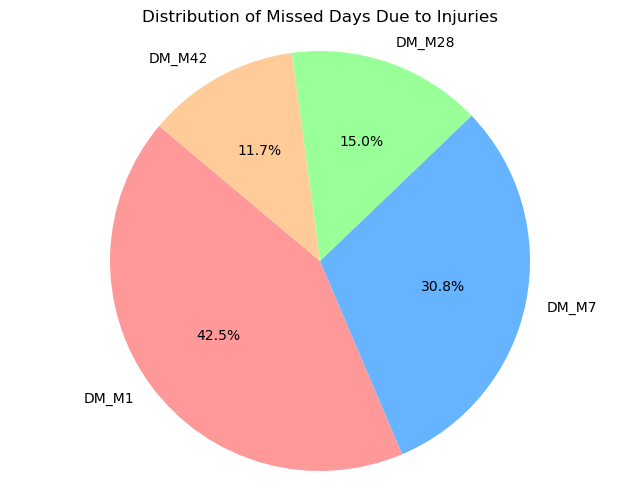

In [12]:
# Creating the pie chart
labels = dm_stats.index
sizes = dm_stats.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Custom colors
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Missed Days Due to Injuries')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

Temperature: 

In [13]:
numerical_attributes = ['Temperature']
statistics = playlist[numerical_attributes].describe()
print("Basic Statistics:\n", statistics)

Basic Statistics:
          Temperature
count  267005.000000
mean      -35.029535
std       304.583110
min      -999.000000
25%        44.000000
50%        61.000000
75%        72.000000
max        97.000000


In [14]:
total_rows = len(playlist)  # Get the total number of rows
error_count = (playlist['Temperature'] == -999).sum()  # Count how many -999 values are in the Temperature column

print(f"Total Rows: {total_rows}")
print(f"Count of -999 in Temperature: {error_count}")

Total Rows: 267005
Count of -999 in Temperature: 24170


In [15]:
# Filter out rows where Temperature is -999
filtered_playlist = playlist[playlist['Temperature'] != -999]

# Calculate basic statistics for the filtered data
numerical_attributes = ['Temperature']
statistics = filtered_playlist[numerical_attributes].describe()

print("Basic Statistics (excluding -999 values):\n", statistics)


Basic Statistics (excluding -999 values):
          Temperature
count  242835.000000
mean       60.916956
std        17.575653
min         9.000000
25%        48.000000
50%        62.000000
75%        74.000000
max        97.000000


Frequence of play, field, injuries

In [20]:

# First, filter out the PlayType entries with a count of 0
df_filtered_playtype = playlist[playlist['PlayType'] != '0']

# Frequency of plays (PlayType), field types (FieldType), and injuries (BodyPart)
play_type_frequency = df_filtered_playtype['PlayType'].value_counts()
field_type_frequency = df_filtered_playtype['FieldType'].value_counts()
body_part_frequency = injuries['BodyPart'].value_counts()

print("\nPlayType Frequency Distribution:\n", play_type_frequency)
print("\nFieldType Frequency Distribution:\n", field_type_frequency)
print("\nBodyPart Frequency Distribution:\n", body_part_frequency)



PlayType Frequency Distribution:
 PlayType
Pass                    138079
Rush                     92606
Extra Point               5906
Kickoff                   5754
Punt                      5746
Field Goal                4915
Kickoff Not Returned      4625
Punt Not Returned         3486
Kickoff Returned          2773
Punt Returned             2469
Name: count, dtype: int64

FieldType Frequency Distribution:
 FieldType
Natural      156749
Synthetic    109977
Name: count, dtype: int64

BodyPart Frequency Distribution:
 BodyPart
Knee     48
Ankle    42
Foot      7
Toes      7
Heel      1
Name: count, dtype: int64


In [ ]:
#Frequency Distribution: Visualizing PlayType, FieldType, and BodyPart
# Bar plot for PlayType frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=playlist, x='PlayType', palette='coolwarm')
plt.title('Frequency of Play Types')
plt.show()

# Bar plot for FieldType frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=playlist, x='FieldType', palette='viridis')
plt.title('Frequency of Field Types')
plt.show()

# Bar plot for BodyPart (injuries) frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=injuries, x='BodyPart', palette='magma')
plt.title('Frequency of Injuries by Body Part')
plt.xticks(rotation=45)
plt.show()